In [1]:
import pylhe
import ROOT
import math
import os
import pandas as pd
import uproot
import numpy as np
import matplotlib.pyplot as plt
import xlrd

Welcome to JupyROOT 6.20/04


In [2]:
#ma<25 ma>25 all define


def file_np(file):
    event = [ file["Delphes;1"]["Electron"].array(),
              file["Delphes;1"]["Electron.PT"].array(),
              file["Delphes;1"]["Electron.Eta"].array(),
              file["Delphes;1"]["Electron.Phi"].array(),
              file["Delphes;1"]["Muon"].array(),                #4
              file["Delphes;1"]["Muon.PT"].array(),
              file["Delphes;1"]["Muon.Eta"].array(),
              file["Delphes;1"]["Muon.Phi"].array(),
              file["Delphes;1"]["Photon"].array(),              #8
              file["Delphes;1"]["Photon.PT"].array(),
              file["Delphes;1"]["Photon.Eta"].array(),
              file["Delphes;1"]["Photon.Phi"].array(),
              file["Delphes;1"]["MissingET"].array(),           #12
              file["Delphes;1"]["MissingET.fUniqueID"].array(),   
              file["Delphes;1"]["MissingET.fBits"].array(),
              file["Delphes;1"]["MissingET.MET"].array(),
              file["Delphes;1"]["MissingET.Eta"].array(),
              file["Delphes;1"]["MissingET.Phi"].array(),
              file["Delphes;1"]["Jet"].array(),                 #18
              file["Delphes;1"]["Jet.EhadOverEem"].array(),     
              file["Delphes;1"]["Jet.Mass"].array(),
              file["Delphes;1"]["Event.Number"].array(),
              file["Delphes;1"]["Jet.Tau[5]"].array(),
              file["Delphes;1"]["Event.CrossSection"].array()
              ]
    
    event = np.expand_dims(event, axis=-1)    ### reshape data
    event = event.transpose((1,0,2))
    event = np.squeeze(event,axis=(2,))
    return event 

################################################

def prlen(events):
    print(len(events))

    
###############################################  simple sel (any=? l=1 j>1)

def num_sl(event,lab,num):
    where1 = np.where(event[:,lab]==num)
    return event[where1]

def l_sl(event):
    where1 = np.where(event[:,0]+event[:,4]==1)
    return event[where1]

def j_sl(event):
    where1 = np.where(event[:,18]>0)
    return(event[where1])  

def Ehover(event,sl_jet):
    where=[]
    for i in range(len(event)):
        if np.min(event[i][19])<0.2:
            where.append(i)
            sl_jet.append(np.min(event[i][19]))
    return event[where]   
       
################################################  maa caculate
def m_aa(events, m, pt1):
    where1=[]   
    for i in range(len(events)):
        p = [0,0,0,0] 
        for j in range(events[i][8]):
            pt = events[i][9][j]   
            eta = events[i][10][j]  
            phi = events[i][11][j]    
            p[1] = p[1] + pt*np.cos(phi)    ### px
            p[2] = p[2] + pt*np.sin(phi)    ### py
            p[3] = p[3] + pt*np.sinh(eta)   ### pz
            p[0] = p[0] + np.sqrt( (pt*np.cos(phi))**2 + (pt*np.sin(phi))**2 + (pt*np.sinh(eta))**2 )     
        maa = np.sqrt(p[0]**2 - p[1]**2 - p[2]**2 - p[3]**2)
        m.append(maa)
        pTaa = np.sqrt(p[1]**2 + p[2]**2)
        pt1.append(pTaa)
        if max_d<maa<max_u:
            where1.append(i)
    return events[where1]
################################################        
def pt_sl(events):
    where1=[]
    for i in range(len(events)):
        p = [0,0,0,0]    
        for j in range(events[i][8]):
            pt = events[i][9][j]    
            eta = events[i][10][j]    
            phi = events[i][11][j]   
            p[1] = p[1] + pt*np.cos(phi)    ### px
            p[2] = p[2] + pt*np.sin(phi)    ### py
        pTaa = np.sqrt(p[1]**2 + p[2]**2)    
        if pTaa>50:
              where1.append(i)
    return events[where1]
################################################
def mvl_sl(events,m):
    for i in range(len(events)):
        p = [0,0,0,0]
        if events[i][0]==1:
            pt1  = events[i][1][0]    
            eta1 = events[i][2][0]    
            phi1 = events[i][3][0]
            pt2  = events[i][15][0]    
            eta2 = events[i][16][0]    
            phi2 = events[i][17][0]
            
            p[1] = pt1*np.cos(phi1) + pt2*np.cos(phi2)    ### px
            p[2] = pt1*np.sin(phi1) + pt2*np.sin(phi2)    ### py
            p[3] = pt1*np.sinh(eta1)+ pt2*np.sinh(eta2)   ### pz
            p[0] = np.sqrt(me**2 + (pt1*np.cos(phi1))**2 + (pt1*np.sin(phi1))**2 + (pt1*np.sinh(eta1))**2)+np.sqrt((pt2*np.cos(phi2))**2 + (pt2*np.sin(phi2))**2 + (pt2*np.sinh(eta2))**2)
            mlv = np.sqrt(p[0]**2 - p[1]**2 - p[2]**2 - p[3]**2)
        elif events[i][4]==1 :
            pt1  = events[i][5][0]    
            eta1 = events[i][6][0]    
            phi1 = events[i][7][0]
            pt2  = events[i][15][0]    
            eta2 = events[i][16][0]    
            phi2 = events[i][17][0]
            
            p[1] = pt1*np.cos(phi1) + pt2*np.cos(phi2)    ### px
            p[2] = pt1*np.sin(phi1) + pt2*np.sin(phi2)    ### py
            p[3] = pt1*np.sinh(eta1)+ pt2*np.sinh(eta2)   ### pz
            p[0] = np.sqrt(mu**2 + (pt1*np.cos(phi1))**2 + (pt1*np.sin(phi1))**2 + (pt1*np.sinh(eta1))**2)+np.sqrt((pt2*np.cos(phi2))**2 + (pt2*np.sin(phi2))**2 + (pt2*np.sinh(eta2))**2)
            mlv = np.sqrt(p[0]**2 - p[1]**2 - p[2]**2 - p[3]**2)
        m.append(mlv)
################################################## must 1l events
def MTvl_sl(events,m,pt):
    where1=[]
    for i in range(len(events)):
        p = [0,0,0,0]
        if events[i][0]==1:
            pt1  = events[i][1][0]    
            eta1 = events[i][2][0]    
            phi1 = events[i][3][0]
            pt2  = events[i][15][0]    
            eta2 = events[i][16][0]    
            phi2 = events[i][17][0]
            
            p[1] = pt1*np.cos(phi1) + pt2*np.cos(phi2)    ### px
            p[2] = pt1*np.sin(phi1) + pt2*np.sin(phi2)    ### py
            p[3] = pt1*np.sinh(eta1)+ pt2*np.sinh(eta2)   ### pz
            p[0] = np.sqrt(me**2 + (pt1*np.cos(phi1))**2 + (pt1*np.sin(phi1))**2 )+np.sqrt((pt2*np.cos(phi2))**2 + (pt2*np.sin(phi2))**2)
            mlv  = np.sqrt(p[0]**2 - p[1]**2 - p[2]**2 )
            ptlv = np.sqrt(p[1]**2 + p[2]**2 )
        elif events[i][4]==1 :
            pt1  = events[i][5][0]    
            eta1 = events[i][6][0]    
            phi1 = events[i][7][0]
            pt2  = events[i][15][0]    
            eta2 = events[i][16][0]    
            phi2 = events[i][17][0]
            
            p[1] = pt1*np.cos(phi1) + pt2*np.cos(phi2)    ### px
            p[2] = pt1*np.sin(phi1) + pt2*np.sin(phi2)    ### py
            p[3] = pt1*np.sinh(eta1)+ pt2*np.sinh(eta2)   ### pz
            p[0] = np.sqrt(mu**2 + (pt1*np.cos(phi1))**2 + (pt1*np.sin(phi1))**2 )+np.sqrt((pt2*np.cos(phi2))**2 + (pt2*np.sin(phi2))**2 )
            mlv = np.sqrt(p[0]**2 - p[1]**2 - p[2]**2 )
            ptlv = np.sqrt(p[1]**2 + p[2]**2 )
        
        m.append(mlv)
        pt.append(ptlv)
        if mlv > 58:
            where1.append(i)
    return(events[where1])
##################################################   
def PTvl_sl(events,m,pt):
    where1=[]
    for i in range(len(events)):
        p = [0,0,0,0]
        if events[i][0]==1:
            pt1  = events[i][1][0]    
            eta1 = events[i][2][0]    
            phi1 = events[i][3][0]
            pt2  = events[i][15][0]    
            eta2 = events[i][16][0]    
            phi2 = events[i][17][0]
            
            p[1] = pt1*np.cos(phi1) + pt2*np.cos(phi2)    ### px
            p[2] = pt1*np.sin(phi1) + pt2*np.sin(phi2)    ### py
            p[3] = pt1*np.sinh(eta1)+ pt2*np.sinh(eta2)   ### pz
            p[0] = np.sqrt(me**2 + (pt1*np.cos(phi1))**2 + (pt1*np.sin(phi1))**2 )+np.sqrt((pt2*np.cos(phi2))**2 + (pt2*np.sin(phi2))**2)
            mlv  = np.sqrt(p[0]**2 - p[1]**2 - p[2]**2 )
            ptlv = np.sqrt(p[1]**2 + p[2]**2 )
        elif events[i][4]==1 :
            pt1  = events[i][5][0]    
            eta1 = events[i][6][0]    
            phi1 = events[i][7][0]
            pt2  = events[i][15][0]    
            eta2 = events[i][16][0]    
            phi2 = events[i][17][0]
            
            p[1] = pt1*np.cos(phi1) + pt2*np.cos(phi2)    ### px
            p[2] = pt1*np.sin(phi1) + pt2*np.sin(phi2)    ### py
            p[3] = pt1*np.sinh(eta1)+ pt2*np.sinh(eta2)   ### pz
            p[0] = np.sqrt(mu**2 + (pt1*np.cos(phi1))**2 + (pt1*np.sin(phi1))**2 )+np.sqrt((pt2*np.cos(phi2))**2 + (pt2*np.sin(phi2))**2 )
            mlv = np.sqrt(p[0]**2 - p[1]**2 - p[2]**2 )
            ptlv = np.sqrt(p[1]**2 + p[2]**2 )
        m.append(mlv)
        pt.append(ptlv)
        if ptlv > 50:
            where1.append(i)
    return(events[where1])
########################################################################################
def significance(s,b):   ### t = (sigma b)^2
    t = (b*0.1)**2
    g = 2*((s+b)*np.log((s+b)*(b+t)/(b**2+(s+b)*t))-((b**2)/t)*np.log(1+(t*s/(b*(b+t)))))
    return np.sqrt(g)

def signif_short(s,b):
    return np.sqrt(2*((s+b)*np.log(1+s/b)-s))

########################################################################################
def z_2(f, left, right, epsilon=1e-12):
    if left >= right:
        return None

    while abs(right - left) > epsilon:
        mid = (left + right) / 2
        f_mid = f(mid,b)-2
        if f_mid == 0:
            return mid
        elif f_mid < 0:
            left = mid
        elif f_mid > 0:
            right = mid

    return (left + right) / 2



####################################################################################################
def j_mass(events,j_mass):
    where = []
    for i in range(len(events)):
        where1 = np.where(events[i][19]==np.min(events[i][19]))
        for j in range(len(where1[0])):
            jet_m = events[i][20][where1[0][j]]
            j_mass.append(jet_m)
            where.append(i)  
    c = np.unique(where)
    return events[c]


##################################################
def j_mass_sl(events,j_mass):
    where = []
    for i in range(len(events)):
        where1 = np.where(events[i][19]==np.min(events[i][19]))
        for j in range(len(where1[0])):
            jet_m = events[i][20][where1[0][j]]
            if max_d<jet_m<max_u:
                j_mass.append(jet_m)
                where.append(i)  
    if not where:
        c = []
    else:
        c = np.unique(where)
    return events[c]
#######################################################################################
def draw_tau2overtau1(events,tau2overtau1):
    for i in range(len(events)):
        where1 = np.where(events[i][19]==np.min(events[i][19]))
        for j in range(len(where1[0])):
            tau1 = events[i][22][where1[0][j]][0]
            tau2 = events[i][22][where1[0][j]][1]
            if tau1 != 0 :
                tau2overtau1.append(tau2/tau1)
                
def tau2overtau1_sl(events):
    where = []
    for i in range(len(events)):
        where1 = np.where(events[i][19]==np.min(events[i][19]))
        for j in range(len(where1[0])):
            tau1 = events[i][22][where1[0][j]][0]
            tau2 = events[i][22][where1[0][j]][1]
            if tau1 != 0 :
                if tau2/tau1<0.05:
                    where.append(i)
    return events[where]
                               
########################################################################################





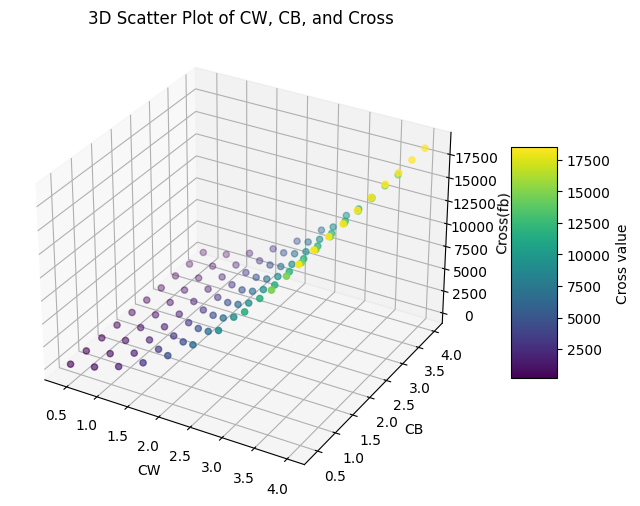

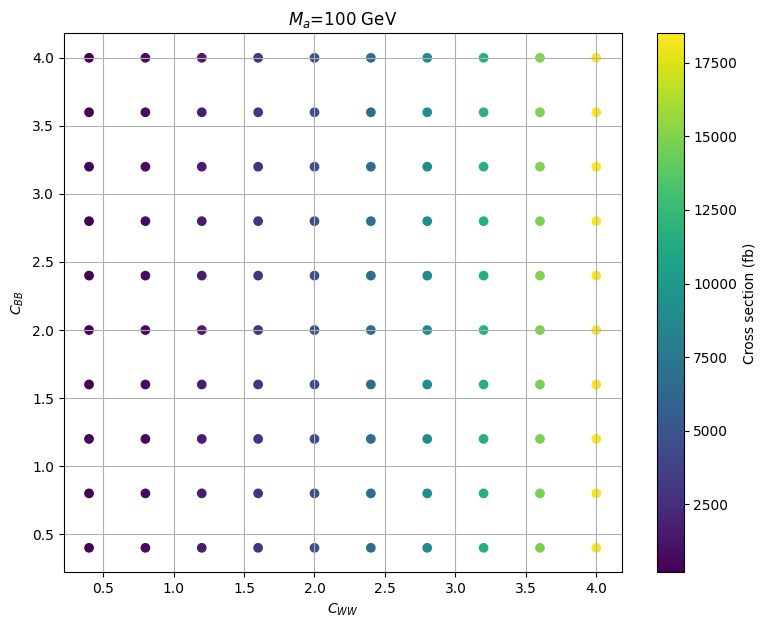

[183.66750000000002, 182.80460000000002, 183.5917, 183.3475, 182.2273, 183.7309, 184.00220000000002, 182.2794, 184.0361, 183.71460000000002, 733.614, 731.885, 736.7869999999999, 733.949, 739.183, 730.522, 736.29, 731.366, 734.923, 731.723, 1648.107, 1645.383, 1643.5310000000002, 1659.5610000000001, 1647.041, 1652.955, 1654.603, 1655.617, 1656.875, 1653.077, 2926.52, 2925.144, 2930.952, 2951.758, 2937.025, 2936.899, 2958.578, 2956.687, 2932.191, 2941.804, 4565.576, 4583.505, 4589.746, 4601.378000000001, 4585.317, 4577.322, 4594.867, 4602.5650000000005, 4622.491, 4597.944, 6585.89, 6564.5, 6565.08, 6613.360000000001, 6635.1, 6594.55, 6591.96, 6654.02, 6612.45, 6618.48, 8955.06, 8920.27, 8996.58, 9033.16, 9047.359999999999, 8993.76, 9007.31, 9021.86, 9053.470000000001, 9015.18, 11725.6, 11708.109999999999, 11724.119999999999, 11745.29, 11737.19, 11748.36, 11758.16, 11765.35, 11787.52, 11748.150000000001, 14787.92, 14827.070000000002, 14839.710000000001, 14851.4, 14844.039999999999, 14933.

In [14]:
file_path = '/data/event/sg_scan_cwcb04_40/Events/scan_run_[01-100].txt'


X_section100 = []


with open(file_path, 'r') as file:
    lines = file.readlines()  # 讀取所有行

    #  'cross' 
    header = lines[0].split()
    cross_index = header.index('cross')

    # 提取 'cross' 數據到列表
    for line in lines[1:]:
        values = line.split()
        cross_value = float(values[cross_index])
        X_section100.append(cross_value*1000)
####################################################        
cw_start = 0.4
cb_start = 0.4


runs = {}

for i in range(10):
    cw = cw_start + 0.4 * i
    for j in range(10):
        cb = cb_start + 0.4 * j
        run_label = i * 10 + j + 1
        runs[run_label] = [cw, cb]  
####################################################
        


from mpl_toolkits.mplot3d import Axes3D


cw_values = [runs[key][0] for key in sorted(runs)]
cb_values = [runs[key][1] for key in sorted(runs)]




fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(cw_values, cb_values, X_section100, c=X_section100, cmap='viridis')
cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('Cross value')

ax.set_xlabel('CW')
ax.set_ylabel('CB')
ax.set_zlabel('Cross(fb)')

ax.set_title('3D Scatter Plot of CW, CB, and Cross')
plt.show

plt.figure(figsize=(9, 7))                                                   
scatter = plt.scatter(cw_values, cb_values, c=X_section100, cmap='viridis')
bar = plt.colorbar(scatter)
bar.set_label('Cross section (fb)')
plt.title(r"$M_{a}$=100 GeV")
plt.xlabel(r"$C_{WW}$")
plt.ylabel(r"$C_{BB}$")
plt.grid(True)
plt.show()

print(X_section100)
print(runs)

In [4]:
from tqdm import tqdm
############################################ chose the point

m_axlist = [100,80,65,50,40,30]
x_seclist = [4584, 5583, 6640, 7858, 8969, 10220]

###################### fa,gaww
fa_limt_300 = []
fa_limt_3000 = []
gaww_limt_300 = []
gaww_limt_3000 = []

s_fa_limt_300 = []
s_fa_limt_3000 = []
s_gaww_limt_300 = []
s_gaww_limt_3000 = []
###################### s,b
L300s = []
L3000s = []
L300b = []
L3000b = []

######################################## s = sg_Xsection*(sgsl_event/sgNsl_event)*Lum[k]             
s_list_300 = []     
s_list_3000 = [] 
b_list_300 = []
b_list_3000 = []

select_rate_300 = []
select_rate_3000 = []
#######################################################################################change for different cwcb scan
###run_odd  ma=10Gev  CW0.1 - 1.1
###run_even ma=100Gev CW0.1 - 1.1
C_W_start = 0.4
C_B_start = 0.4

bg_file = uproot.open("/data/event/final/bg_ppaalvll/Events/run_01/tag_1_delphes_events.root")
bg_events = file_np(bg_file)

#進度條
total_runs = 100
with tqdm(total=100, desc="Processing runs", unit="run") as pbar:
    for p in range(10):

        C_W = C_W_start + 0.4 * p
        for r in range(10):

            pbar.update(1)

            C_B = C_B_start + 0.4 * r

            run_number = p * 10 + r + 1
            sg_file = uproot.open(f"/data/event/sg_scan_cwcb04_40/Events/run_{run_number:02}/tag_1_delphes_events.root") 

            m_ax = 100
            bg_Xsection = 94.37
            sg_Xsection = X_section100[ p * 10 + r ]   #fb = pb*1000

            # bg_x : 94.37
            # sg_x : 100(4584) 90(5059) 80(5583) 70(6252) 60(6998) 50(7858) 40(8969) 30(10220) |25(10890)

            sg_events = file_np(sg_file)
#######################################################################################            
            ################################################for define
            me = 0.000511
            mu = 0.10566


            max_shift = m_ax*0.1
            max_u = m_ax + max_shift
            max_d = m_ax - max_shift
            ####################################################################################### two_a , 1_l , maa , pt sel
            sgsl_2a = num_sl(sg_events,8,2)
            sgsl_2a_1l = l_sl(sgsl_2a)
            bgsl_2a = num_sl(bg_events,8,2)
            bgsl_2a_1l = l_sl(bgsl_2a)
            ####################### drow picture use
            maa_sgsl_2a_1l=[]
            pt_sgsl_2a_1l=[]
            maa_bgsl_2a_1l=[]
            pt_bgsl_2a_1l=[]

            ################################## maa sl result (drow pic)
            sgsl_2a_1l_msl = m_aa(sgsl_2a_1l,maa_sgsl_2a_1l,pt_sgsl_2a_1l)   ###msl   90<max<110
            bgsl_2a_1l_msl = m_aa(bgsl_2a_1l,maa_bgsl_2a_1l,pt_bgsl_2a_1l) 

            ################################## pTaa sl
            sgsl_2a_1l_pt = pt_sl(sgsl_2a_1l)
            bgsl_2a_1l_pt = pt_sl(bgsl_2a_1l)

            ############################################################################## PT(lvl) MT(lvl)
            MTvlsgsl_2a_1l_pt=[]
            MTvlbgsl_2a_1l_pt=[]

            PTvlsgsl_2a_1l_pt=[]
            PTvlbgsl_2a_1l_pt=[]

            sgsl_2a_1l_pt_MTsl = MTvl_sl(sgsl_2a_1l_pt, MTvlsgsl_2a_1l_pt, PTvlsgsl_2a_1l_pt)
            bgsl_2a_1l_pt_MTsl = MTvl_sl(bgsl_2a_1l_pt, MTvlbgsl_2a_1l_pt, PTvlbgsl_2a_1l_pt)

            ##############################################################################
            maa_sgsl_2a_1l_pt_MTsl=[]
            pt_sgsl_2a_1l_pt_MTsl=[]
            maa_bgsl_2a_1l_pt_MTsl=[]
            pt_bgsl_2a_1l_pt_MTsl=[]

            sgsl_2a_1l_pt_MTsl_msl = m_aa(sgsl_2a_1l_pt_MTsl,maa_sgsl_2a_1l_pt_MTsl,pt_sgsl_2a_1l_pt_MTsl)   # final sl  sgsl_2a_1l_pt_msl
            bgsl_2a_1l_pt_MTsl_msl = m_aa(bgsl_2a_1l_pt_MTsl,maa_bgsl_2a_1l_pt_MTsl,pt_bgsl_2a_1l_pt_MTsl)   # final sl  bgsl_2a_1l_pt_msl

            ##############################################################################

            bgsl_event = len(bgsl_2a_1l_pt_MTsl_msl)
            sgsl_event = len(sgsl_2a_1l_pt_MTsl_msl)
            bgNsl_event = len(bg_events)
            sgNsl_event = len(sg_events)


            fa = 1000
            sin_w_2 = 0.22290
            cos_w_2 = 1 - sin_w_2

            Lum = [300,3000]


    #         print('\033[0;31mma :\033[0m',m_ax)
    #         print('\033[0;31mCW :\033[0m',C_W)
    #         print('\033[0;31mCB :\033[0m',C_B)
    #         print('\033[0;31mX_section :\033[0m',X_section100[ p * 10 + r ])
    #         print('\033[0;33msg sl :\033[0m',len(sgsl_2a_1l_pt_MTsl_msl))
    #         print('\033[0;34mbg sl :\033[0m',len(bgsl_2a_1l_pt_MTsl_msl))


        ####################################################################################    
            for k in range(len(Lum)):
                
                s = sg_Xsection*(sgsl_event/sgNsl_event)*Lum[k]
                b = bg_Xsection*(bgsl_event/bgNsl_event)*Lum[k]
                
        ############################################################### s , b list
                if k == 0:
    #                 print('*********************************uncertainty z')
    #                 print('\033[0;33ms_300 :\033[0m',s)
    #                 print('\033[0;34mb_300 :\033[0m',b)
                    s_list_300.append(s)
                    b_list_300.append(b)
                    select_rate_300.append(sgsl_event/sgNsl_event)
                elif k == 1:
    #                 print('*********************************')
    #                 print('\033[0;33ms_3000 :\033[0m',s)
    #                 print('\033[0;34mb_3000 :\033[0m',b)
                    s_list_3000.append(s)
                    b_list_3000.append(b)
                    select_rate_3000.append(sgsl_event/sgNsl_event)
        ###############################################################     

                for j in range(0,10000):
                    if 1>significance(j,b)-2>0:
                        max_n = j
            #           print(significance(i,b))
                        break

                max_n = max_n        
                min_n = max_n - 1

                exp_s = z_2(significance, min_n, max_n)  ###  exp_s=3 
                exp_sg_Xsection = (exp_s*sg_Xsection/s)

    #             print('\033[0;36mLuminosity:',Lum[k],'\033[0m')
    #     #         print('sg_Xsection:',sg_Xsection)
    #     #         print('z:',significance(s,b))
    #     #         print('exp_z:',significance(exp_s,b))
    #             print('exp_s:',exp_s)
    #     #         print('exp_sg_Xsection:',exp_sg_Xsection)

                fa_limit = fa*np.sqrt(sg_Xsection/exp_sg_Xsection)
                gaww_limt = (4*C_W)/fa_limit
                if k == 0:
                    fa_limt_300.append(fa_limit)
                    gaww_limt_300.append(gaww_limt)
                elif k == 1:
                    fa_limt_3000.append(fa_limit)
                    gaww_limt_3000.append(gaww_limt)

    #             print('fa_limit',fa_limit)
    #             print('gaww_limt',gaww_limt)
    #         print('*********************************z')
        ############################################################################## 
            for k in range(len(Lum)):

                s = sg_Xsection*(sgsl_event/sgNsl_event)*Lum[k]
                b = bg_Xsection*(bgsl_event/bgNsl_event)*Lum[k]

                for i in range(0,10000):
                    if 1>signif_short(i,b)-2>0:
                        max_n = i
            #           print(significance(i,b))
                        break

                max_n = max_n        
                min_n = max_n - 1

                exp_s = z_2(signif_short, min_n, max_n)  ###  exp_s=3 
                exp_sg_Xsection = (exp_s*sg_Xsection/s)

    #             print('\033[0;36mshort_sign-Luminosity:',Lum[k],'\033[0m')
    #         #     print('sg_Xsection:',sg_Xsection)
    #         #     print('z:',significance(s,b))
    #         #     print('exp_z:',significance(exp_s,b))
    #             print('exp_s:',exp_s)
    #         #     print('exp_sg_Xsection:',exp_sg_Xsection)

                fa_limit = fa*np.sqrt(sg_Xsection/exp_sg_Xsection)
                gaww_limt = (4*C_W)/fa_limit
                if k == 0:
                    s_fa_limt_300.append(fa_limit)
                    s_gaww_limt_300.append(gaww_limt)
                elif k == 1:
                    s_fa_limt_3000.append(fa_limit)
                    s_gaww_limt_3000.append(gaww_limt)

    #             print('fa_limit',fa_limit)
    #             print('gaww_limt',gaww_limt)


    #         print('******************************************************')


Processing runs:   7%|████▌                                                            | 7/100 [00:41<10:00,  6.46s/run]/tmp/ipykernel_26926/2329522649.py:147: RuntimeWarning: invalid value encountered in sqrt
  mlv  = np.sqrt(p[0]**2 - p[1]**2 - p[2]**2 )
Processing runs:  26%|████████████████▋                                               | 26/100 [02:43<08:04,  6.54s/run]/tmp/ipykernel_26926/2329522649.py:161: RuntimeWarning: invalid value encountered in sqrt
  mlv = np.sqrt(p[0]**2 - p[1]**2 - p[2]**2 )
Processing runs: 100%|███████████████████████████████████████████████████████████████| 100/100 [10:32<00:00,  6.32s/run]


In [5]:
# print(fa_limt_300)
print(gaww_limt_300)

[6.938225884036485e-05, 7.160057663217352e-05, 7.112456058531147e-05, 7.108662320054933e-05, 7.162718727543229e-05, 7.157174544970665e-05, 7.193585768067146e-05, 7.172537857520095e-05, 7.197353701939522e-05, 7.137980446306849e-05, 7.124662512158036e-05, 7.141672421640598e-05, 7.002674718871685e-05, 7.040905473096913e-05, 7.171507001134312e-05, 7.067796530824672e-05, 7.159245200927264e-05, 7.133457926738065e-05, 7.144152565029069e-05, 7.199132748046252e-05, 7.16904427621758e-05, 7.272962978989049e-05, 7.000328567036806e-05, 6.998896635033461e-05, 7.098338206136718e-05, 7.012868161552443e-05, 7.185618656043539e-05, 7.071506369675823e-05, 6.982185260629578e-05, 7.108705614031072e-05, 7.119339296727648e-05, 7.091333731030957e-05, 7.052943613833475e-05, 7.173142047506889e-05, 7.317916035507483e-05, 7.002629738056616e-05, 7.030296101547314e-05, 6.981188299847809e-05, 7.032839706827898e-05, 7.158963766476971e-05, 7.245261540701174e-05, 7.079192508493016e-05, 6.983729760250743e-05, 6.997203704

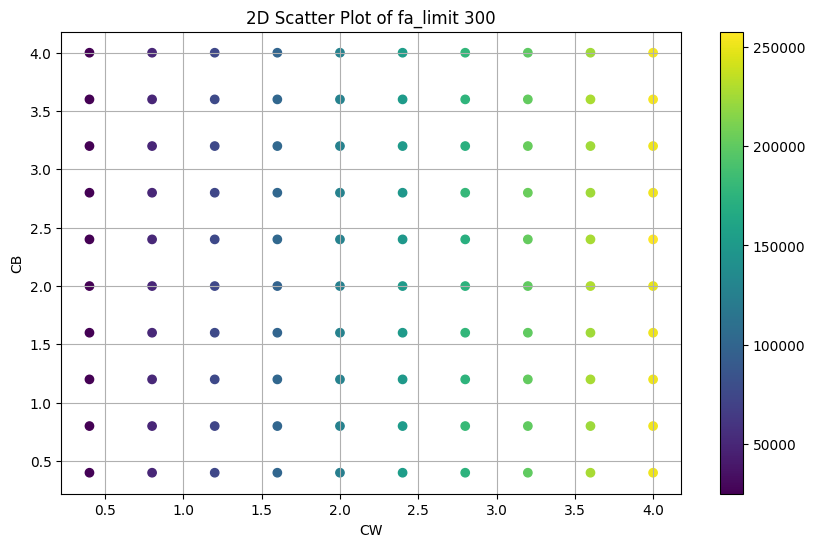

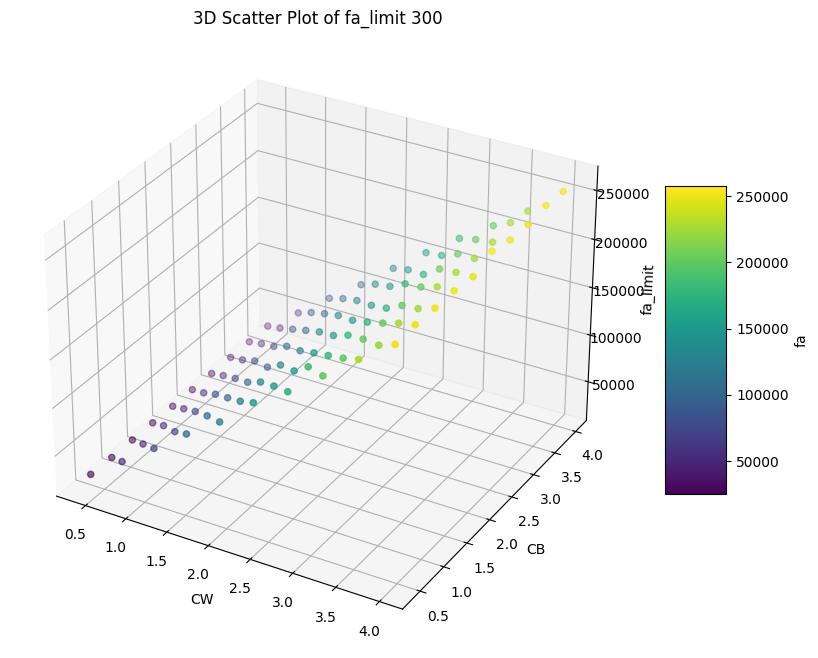

gaww average: 6.347539406980212e-05
cw=2 cb=1 gaww average: 6.346013545168331e-05


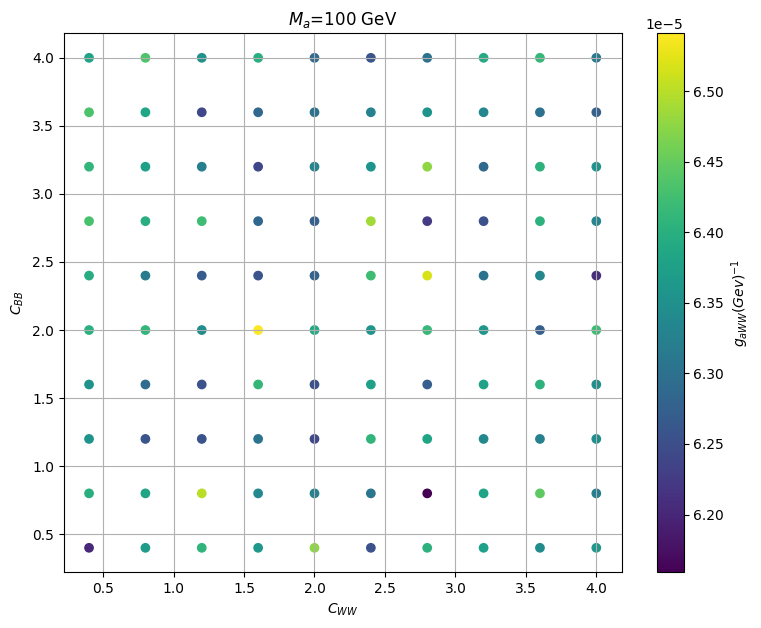

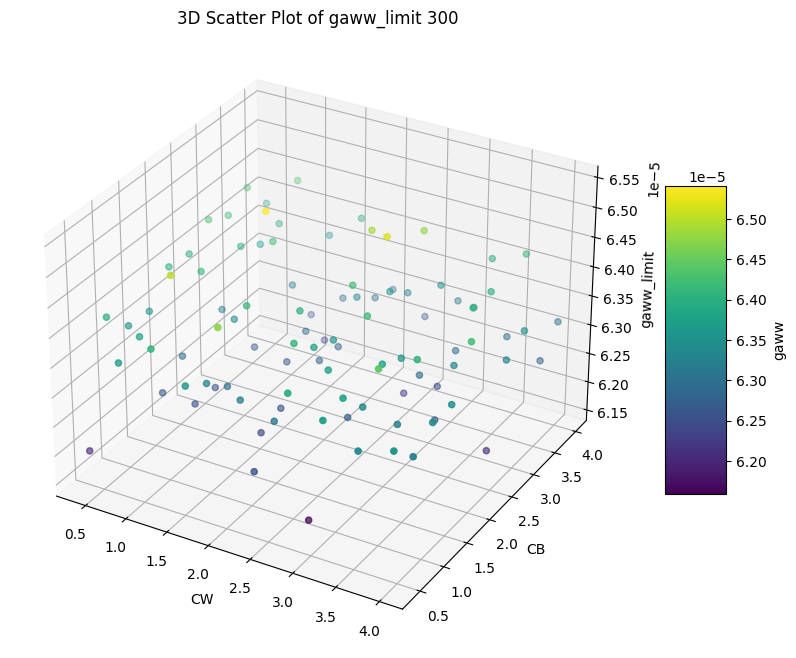

select rate average: 0.16718
cw=2 cb=1 select rate : 0.1674


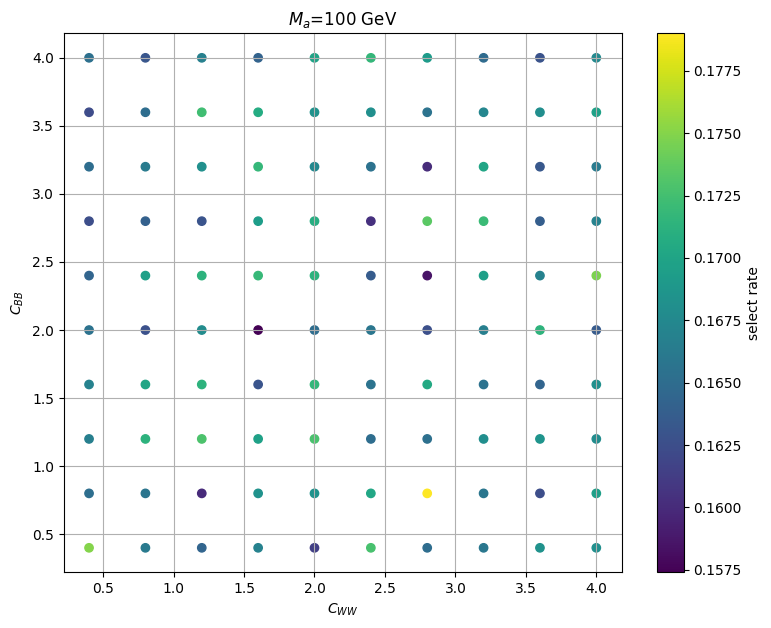

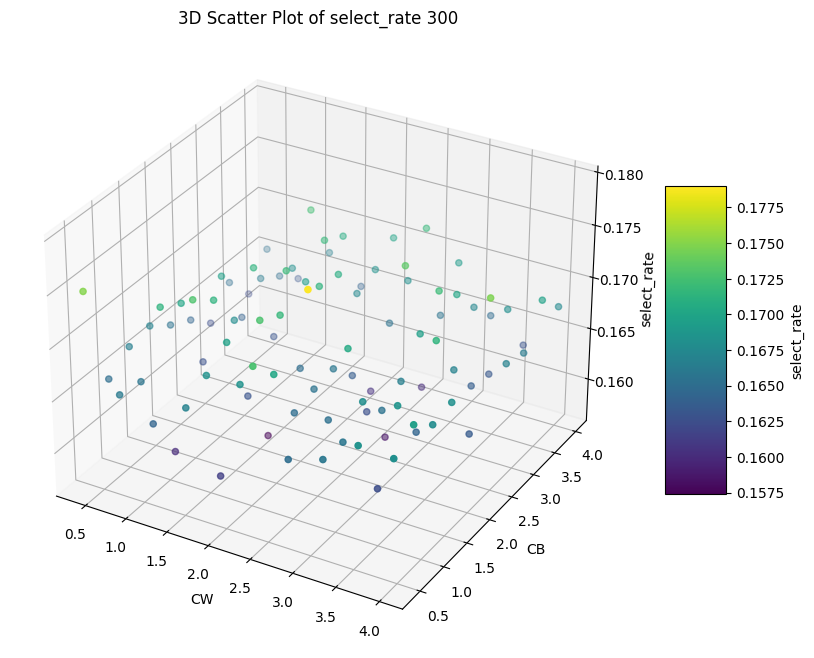

In [16]:


########################################################################



plt.figure(figsize=(10, 6))                                                   
scatter = plt.scatter(cw_values, cb_values, c=s_fa_limt_300, cmap='viridis')
plt.colorbar(scatter)
plt.title('2D Scatter Plot of fa_limit 300')
plt.xlabel('CW')
plt.ylabel('CB')
plt.grid(True)
plt.show()




fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(cw_values, cb_values, s_fa_limt_300, c=s_fa_limt_300, cmap='viridis')
# scatter = ax.scatter(cw_values, cb_values, s_fa_limt_300, c=s_fa_limt_300, cmap='viridis')
# scatter = ax.scatter(cw_values, cb_values, fa_limt_3000, c=fa_limt_3000, cmap='viridis')
# scatter = ax.scatter(cw_values, cb_values, s_fa_limt_3000, c=s_fa_limt_3000, cmap='viridis')

cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('fa')


ax.set_xlabel('CW')
ax.set_ylabel('CB')
ax.set_zlabel('fa_limit')

ax.set_title('3D Scatter Plot of fa_limit 300')
plt.show()


########################################################################2D

gaww_limt_300_ave = np.mean(s_gaww_limt_300)
print('gaww average:',gaww_limt_300_ave)
print('cw=2 cb=1 gaww average:',6.346013545168331e-05)

plt.figure(figsize=(9, 7))
scatter = plt.scatter(cw_values, cb_values, c=s_gaww_limt_300, cmap='viridis')
gaww_bar = plt.colorbar(scatter)
gaww_bar.set_label(r"$g_{aWW}(Gev)^{-1}$")
plt.title(r"$M_{a}$=100 GeV")
plt.xlabel(r"$C_{WW}$")
plt.ylabel(r"$C_{BB}$")
plt.grid(True)
plt.show()

########################################################################


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(cw_values, cb_values, s_gaww_limt_300, c=s_gaww_limt_300, cmap='viridis')
# scatter = ax.scatter(cw_values, cb_values, s_gaww_limt_300, c=s_gaww_limt_300, cmap='viridis')
# scatter = ax.scatter(cw_values, cb_values, gaww_limt_3000, c=gaww_limt_3000, cmap='viridis')
# scatter = ax.scatter(cw_values, cb_values, s_gaww_limt_3000, c=s_gaww_limt_3000, cmap='viridis')

cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('gaww')

ax.set_xlabel('CW')
ax.set_ylabel('CB')
ax.set_zlabel('gaww_limit')

ax.set_title('3D Scatter Plot of gaww_limit 300')
plt.show()

########################################################################2D

select_rate_300_ave = np.mean(select_rate_300)
print('select rate average:',select_rate_300_ave)
print('cw=2 cb=1 select rate :',0.1674)

plt.figure(figsize=(9, 7))
scatter = plt.scatter(cw_values, cb_values, c=select_rate_300, cmap='viridis')
sel_bar=plt.colorbar(scatter)
sel_bar.set_label('select rate')
plt.title(r"$M_{a}$=100 GeV")
plt.xlabel(r"$C_{WW}$")
plt.ylabel(r"$C_{BB}$")
plt.grid(True)
plt.show()




fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(cw_values, cb_values, select_rate_300, c=select_rate_300, cmap='viridis')

cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('select_rate')

ax.set_xlabel('CW')
ax.set_ylabel('CB')
ax.set_zlabel('select_rate')

ax.set_title('3D Scatter Plot of select_rate 300')
plt.show()


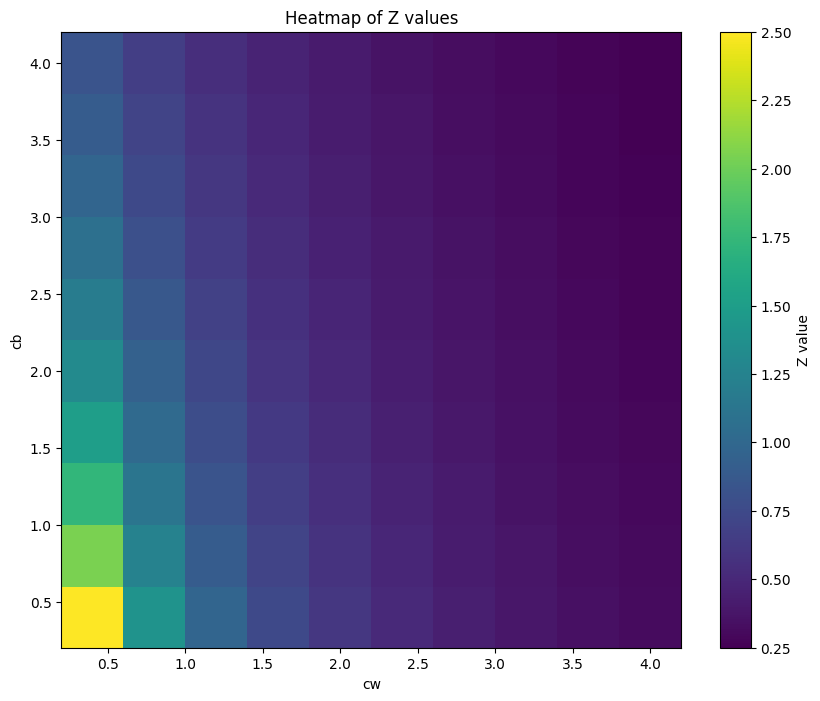

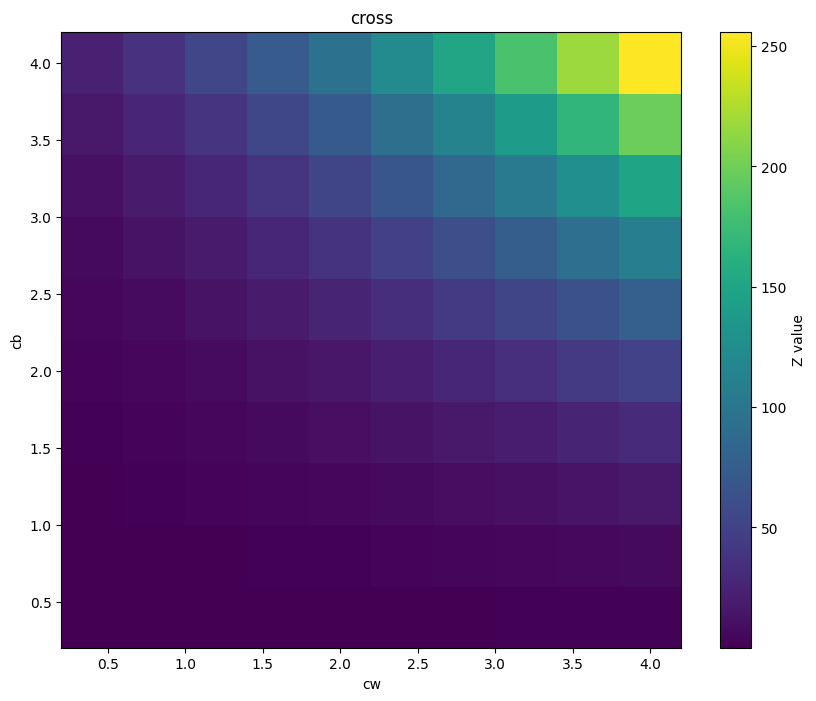

(10,)
(10,)
(10, 10)
(10, 10)


In [7]:

import numpy as np
import matplotlib.pyplot as plt


cw_start = 0.4
cb_start = 0.4
step = 0.4
num_points = 10



cw_val = np.array([cw_start + i * step for i in range(num_points)])
cb_val = np.array([cb_start + j * step for j in range(num_points)])
cw_grid, cb_grid = np.meshgrid(cw_val, cb_val, indexing='ij')


garr = (cb_grid * (1 - 0.22290) + cw_grid * 0.22290)
z_grid = 1/(garr)
nom_z_grid = z_grid/np.max(z_grid)

plt.figure(figsize=(10, 8))
c = plt.pcolormesh(cw_val, cb_val, z_grid, shading='auto')  # shape : cw_val (10,) cb_val (10,) z_grid (10, 10))
plt.colorbar(c, label='Z value')
plt.title('Heatmap of Z values')
plt.xlabel('cw')
plt.ylabel('cb')
plt.show()


plt.figure(figsize=(10, 8))
c = plt.pcolormesh(cw_val, cb_val, (cw_grid*garr)**2, shading='auto')
plt.colorbar(c, label='Z value')
plt.title('cross')
plt.xlabel('cw')
plt.ylabel('cb')
plt.show()

print(cw_val.shape)
print(cb_val.shape)
print(z_grid.shape)
print(cw_grid.shape)

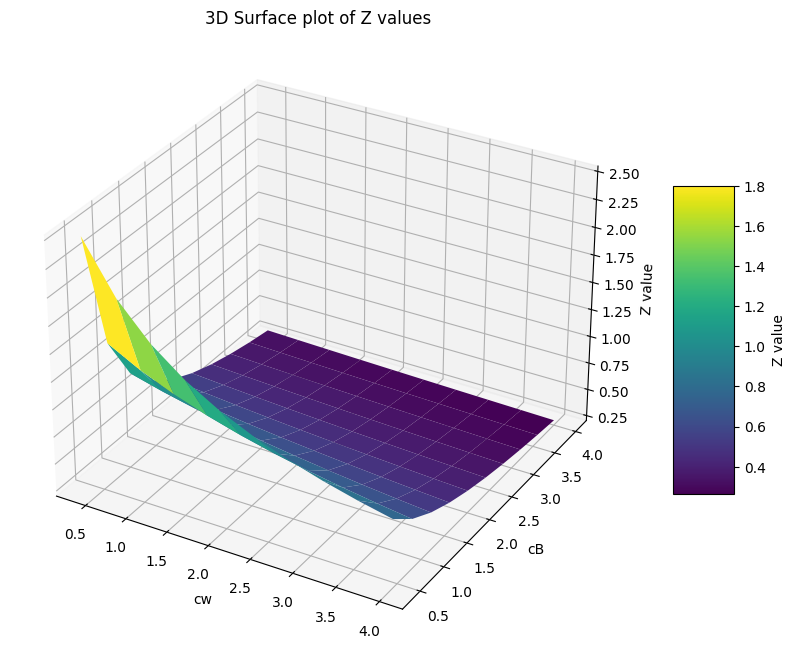

In [8]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(cw_grid, cb_grid, z_grid, cmap='viridis')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, label='Z value')
ax.set_title('3D Surface plot of Z values')
ax.set_xlabel('cw')
ax.set_ylabel('cB')
ax.set_zlabel('Z value')
plt.show()


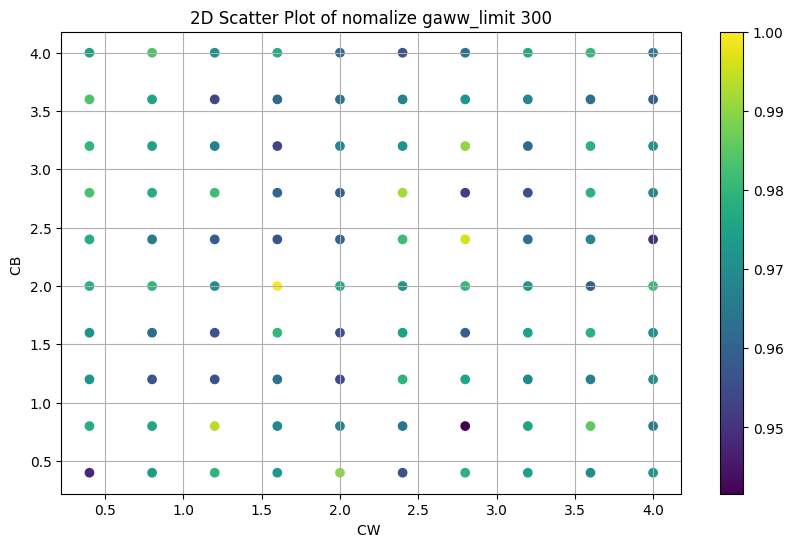

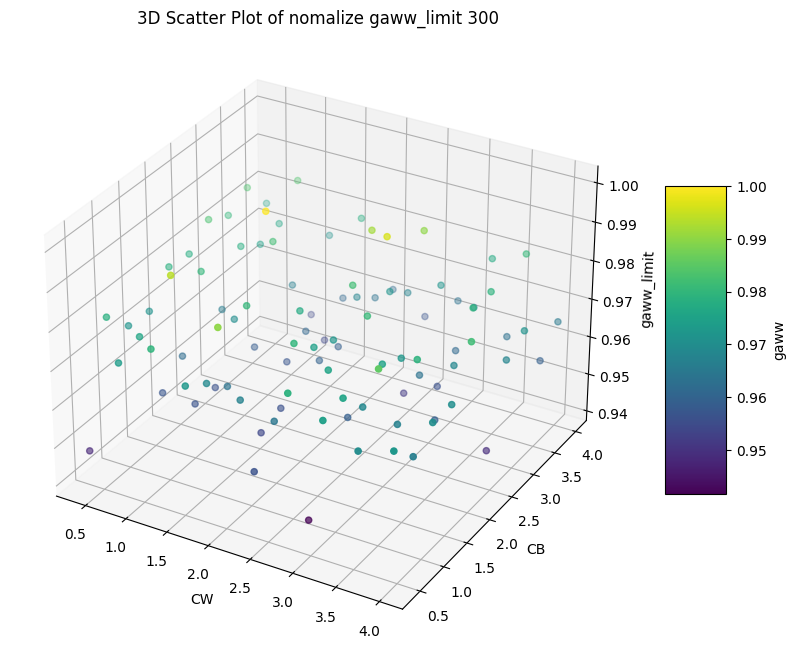

In [9]:
array = np.array(s_gaww_limt_300)
max_value = np.max(array)
normalized_array = array / max_value
normalized_list = normalized_array.tolist()




plt.figure(figsize=(10, 6))
scatter = plt.scatter(cw_grid, cb_grid, c=normalized_list, cmap='viridis')
plt.colorbar(scatter)
plt.title('2D Scatter Plot of nomalize gaww_limit 300')
plt.xlabel('CW ')
plt.ylabel('CB ')
plt.grid(True)
plt.show()




fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(cw_grid, cb_grid, normalized_list, c=normalized_list, cmap='viridis')
# scatter = ax.scatter(cw_values, cb_values, s_gaww_limt_300, c=s_gaww_limt_300, cmap='viridis')
# scatter = ax.scatter(cw_values, cb_values, gaww_limt_3000, c=gaww_limt_3000, cmap='viridis')
# scatter = ax.scatter(cw_values, cb_values, s_gaww_limt_3000, c=s_gaww_limt_3000, cmap='viridis')

cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('gaww')

ax.set_xlabel('CW')
ax.set_ylabel('CB')
ax.set_zlabel('gaww_limit')

ax.set_title('3D Scatter Plot of nomalize gaww_limit 300')
plt.show()